<a href="https://colab.research.google.com/github/amurkhon/MachineLearning-projects/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
!git clone https://github.com/anvarnarz/praktikum_datasets.git

Cloning into 'praktikum_datasets'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 139 (delta 51), reused 100 (delta 15), pack-reused 0
Receiving objects: 100% (139/139), 9.71 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
df = pd.read_csv("/content/praktikum_datasets/housing_LR.csv", index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7278 entries, 0 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7278 non-null   object 
 1   rooms       7278 non-null   int64  
 2   size        7278 non-null   float64
 3   level       7278 non-null   int64  
 4   max_levels  7278 non-null   int64  
 5   price       7278 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 398.0+ KB


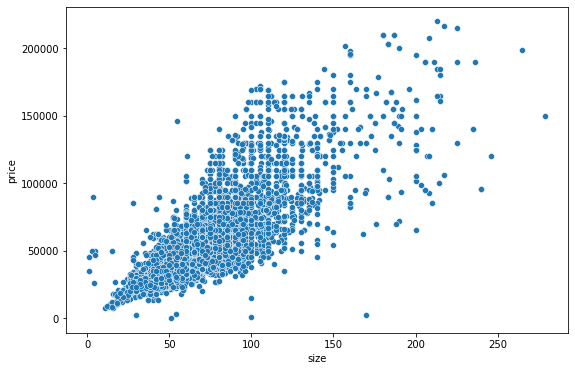

In [ ]:
%matplotlib inline
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='size',y='price')
plt.show()

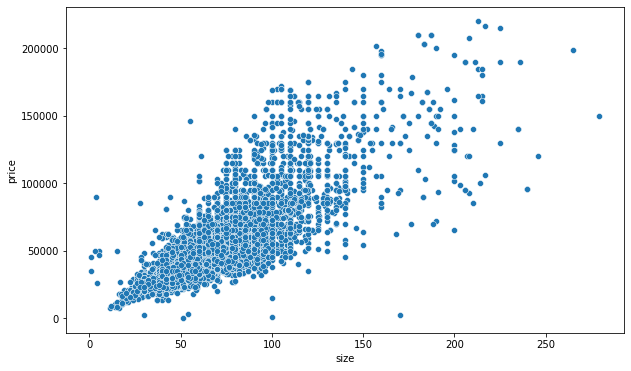

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='size', y='price')
plt.show()

In [ ]:
housing = df[df['district']=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
x = housing['size'].to_numpy()
x

array([42., 65., 70., ..., 32., 70., 30.])

In [ ]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

In [ ]:
Xmean = np.mean(x)
Ymean = np.mean(y)

In [ ]:
theta1 = sum((x-Xmean)*(y-Ymean))/sum((x-Xmean)**2)
theta1

740.0264822713287

In [ ]:
theta0 = Ymean - theta1*Xmean
theta0

-195.94911352690542

In [ ]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test}")

[54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]
[37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


In [ ]:
y_predicted = theta0 + theta1*x_test
y_predicted

array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])

In [ ]:
MAE = sum(abs(y_predicted - y_test))/len(y_test)
print(MAE)

4140.35031634715


In [ ]:
RMSE = np.sqrt(sum((y_predicted - y_test)**2)/len(y_test))
print(RMSE)

5882.051673173715


In [ ]:
housing.shape

(1616, 6)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [ ]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

In [ ]:
x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

In [ ]:
LR_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
theta1 = LR_model.coef_[0][0]
print(theta1)
theta0 = LR_model.intercept_[0]
print(theta0)

732.7784051414766
106.31843170110369


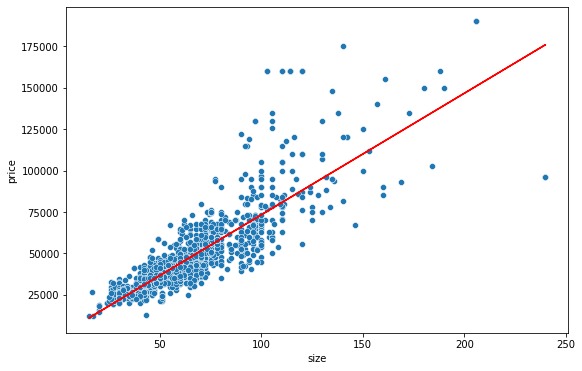

In [ ]:
%matplotlib inline
plt.figure(figsize=(9,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta0 +theta1*x_train, '-r')
plt.show()

MODELNI BAHOLAYMIZ

In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [ ]:
y_predict = LR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE =mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(MAE)
print(RMSE)

7269.709648262382
12734.803748258666
